# Preprocess

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os

In [2]:
os.chdir(r'C:\Users\Giorgos\Desktop\ergasies_metaptxiakwn\ergasia xalkidhs (data mining)\ml-25m')

NameError: name 'os' is not defined

In [3]:
# pd.set_option('display.max_colwidth', -1)

In [4]:
ratings = pd.read_csv('ratings.csv')


In [5]:
ratings

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [6]:
ratings_test=ratings.copy()

In [7]:
ratings.describe()

,userId,movieId,rating,timestamp
count,2.500010e+07,2.500010e+07,2.500010e+07,2.500010e+07
mean,8.118928e+04,2.138798e+04,3.533854e+00,1.215601e+09
std,4.679172e+04,3.919886e+04,1.060744e+00,2.268758e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.196000e+03,3.000000e+00,1.011747e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.198868e+09
75%,1.215570e+05,8.623000e+03,4.000000e+00,1.447205e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


In [8]:
movies = pd.read_csv('movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [9]:
movies_test=movies.copy()

In [10]:
movies.describe()

,movieId
count,62423.000000
mean,122220.387646
std,63264.744844
min,1.000000
25%,82146.500000
50%,138022.000000
75%,173222.000000
max,209171.000000


In [11]:
# find if there are null values

In [12]:
ratings.isnull().sum(axis = 0)

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [13]:
movies.isnull().sum(axis = 0)

movieId    0
title      0
genres     0
dtype: int64

There are no null values


In [14]:
# find rating distribution
list(set(ratings['rating'].tolist()))

[0.5, 1.0, 2.5, 3.5, 4.5, 4.0, 5.0, 3.0, 2.0, 1.5]

ratings vary from 0.5-5.0

From all the potential genres of movies there is an option of no genre listed which doesn't help for further analysis

In [15]:
list(set(movies['genres'].tolist())) 

['Drama|IMAX',
 'Animation|Drama|Fantasy|Mystery',
 'Drama|Film-Noir|Romance|Thriller',
 'Mystery|Romance|Sci-Fi|Thriller',
 'Children|Drama|Mystery|Thriller',
 'Comedy|Horror|Musical',
 'Action|Horror|Sci-Fi|Thriller|IMAX',
 'Comedy|Drama|War|Western',
 'Adventure|Comedy|Documentary',
 'Drama|Fantasy|Horror|Romance|Thriller',
 'Drama|Fantasy|Romance|Thriller',
 'Crime|Horror|Romance',
 'Children|Comedy|Fantasy',
 'Action|Drama|Mystery',
 'Sci-Fi|Thriller|War',
 'Comedy|Horror|Romance|Sci-Fi',
 'Action|Drama|War|IMAX',
 'Animation|Fantasy|Horror',
 'Action|Adventure|Fantasy|IMAX',
 'Action|Sci-Fi|Thriller|War',
 'Adventure|Animation|Drama|Sci-Fi',
 'Adventure|Horror|Mystery',
 'Action|Adventure|Fantasy|Sci-Fi',
 'Mystery|Western',
 'Adventure|Animation|Children|Fantasy|Musical|Sci-Fi',
 'Comedy|Fantasy|Horror|Musical|Thriller',
 'Action|Comedy|Crime|Drama|Mystery',
 'Action|Comedy|Drama|Fantasy|Thriller',
 'Action|Animation|Crime|Sci-Fi',
 'Adventure|Fantasy|Mystery|Thriller',
 'Childr

In [16]:
search_values = ['no genre','nothing'] #΄ shows no genres registers = 5062 registers
movies[movies.genres.str.contains('|'.join(search_values ))]


,movieId,title,genres
15881,83773,Away with Words (San tiao ren) (1999),(no genres listed)
16060,84768,Glitterbug (1994),(no genres listed)
16351,86493,"Age of the Earth, The (A Idade da Terra) (1980)",(no genres listed)
16491,87061,Trails (Veredas) (1978),(no genres listed)
17404,91246,Milky Way (Tejút) (2007),(no genres listed)
...,...,...,...
62400,209101,Hua yang de nian hua (2001),(no genres listed)
62401,209103,Tsar Ivan the Terrible (1991),(no genres listed)
62407,209133,The Riot and the Dance (2018),(no genres listed)
62415,209151,Mao Zedong 1949 (2019),(no genres listed)


In [17]:
search_values = ['no title','nothing'] #΄ There are no possible non titled movies
movies[movies.title.str.contains('|'.join(search_values ))]

,movieId,title,genres
35713,148468,The Garden of Sinners - Chapter 2: …and nothin...,Animation
35716,148474,The Garden of Sinners - Chapter 7: ……not nothi...,Animation


In [18]:
print(movies.loc[movies['movieId']==567])

     movieId        title        genres
560      567  Kika (1993)  Comedy|Drama



The charts show a distribution of movies and ratings. The main conclusions are:

1. Most reviewed genres is Drama and Comedy
2. Most movies have rating between 3-5


<BarContainer object of 19 artists>

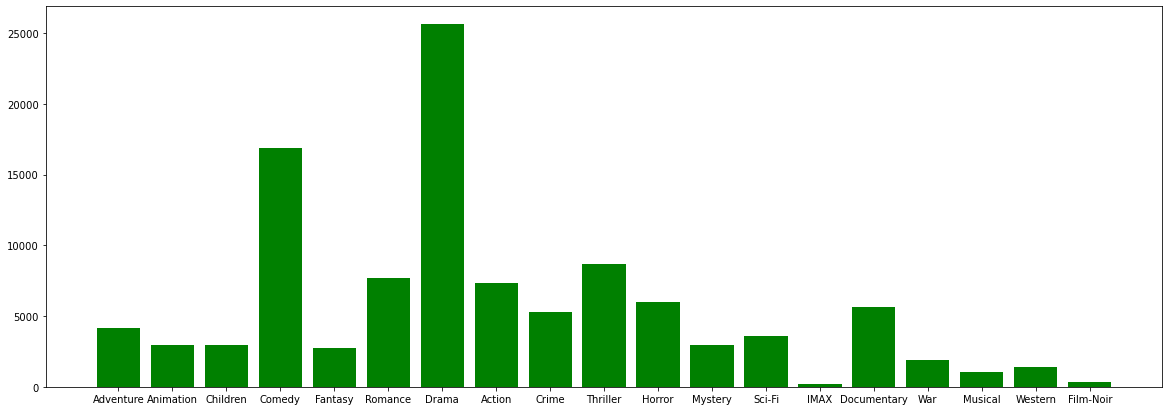

In [20]:
# genres histogram
plt.figure(figsize=(20,7))
genrelist = movies_test['genres'].apply(lambda genrelist_movie : str(genrelist_movie).split("|"))
genre_count = {}

for genrelist_movie in genrelist:
    for genre in genrelist_movie:
        if(genre_count.get(genre,False)):
            genre_count[genre]=genre_count[genre]+1
        else:
            genre_count[genre] = 1       
genre_count.pop("(no genres listed)")
plt.bar(genre_count.keys(),genre_count.values(),color='g')

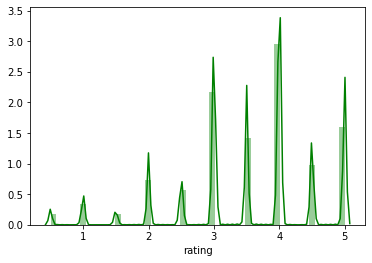

In [21]:
# plot ratings
sns.distplot(ratings["rating"],color='g')


In [22]:
# movies['genres_separated'] = movies['genres'].apply(lambda generlist_movie : str(generlist_movie).split("|"))
# movies

In [23]:
# merge by movieid
ratings_movies = movies.merge(ratings, on='movieId', how='inner')
ratings_movies


,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1141415820
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1439472215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1573944252
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,858625949
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,890492517
...,...,...,...,...,...,...
25000090,209157,We (2018),Drama,119571,1.5,1574280748
25000091,209159,Window of the Soul (2001),Documentary,115835,3.0,1574280985
25000092,209163,Bad Poems (2018),Comedy|Drama,6964,4.5,1574284913
25000093,209169,A Girl Thing (2001),(no genres listed),119571,3.0,1574291826


In [24]:
ratings_movies_time=ratings_movies.copy() # In case we need timestamp for further analysis we make a dataframe

In [25]:
ratings_movies.pop('timestamp') # Pop timestamp for our main analysis dataframe

0           1141415820
1           1439472215
2           1573944252
3            858625949
4            890492517
               ...    
25000090    1574280748
25000091    1574280985
25000092    1574284913
25000093    1574291826
25000094    1574291937
Name: timestamp, Length: 25000095, dtype: int64

In [26]:
ratings_movies

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0
...,...,...,...,...,...
25000090,209157,We (2018),Drama,119571,1.5
25000091,209159,Window of the Soul (2001),Documentary,115835,3.0
25000092,209163,Bad Poems (2018),Comedy|Drama,6964,4.5
25000093,209169,A Girl Thing (2001),(no genres listed),119571,3.0


In [27]:
ratings_movies_time

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1141415820
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1439472215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1573944252
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,858625949
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,890492517
...,...,...,...,...,...,...
25000090,209157,We (2018),Drama,119571,1.5,1574280748
25000091,209159,Window of the Soul (2001),Documentary,115835,3.0,1574280985
25000092,209163,Bad Poems (2018),Comedy|Drama,6964,4.5,1574284913
25000093,209169,A Girl Thing (2001),(no genres listed),119571,3.0,1574291826



Find the size of movies that each user has rated


In [28]:
ratings_by_users = ratings_movies.groupby('userId').agg([np.size, np.mean]) # rated movies by user
ratings_by_users

movieId               rating          
          size          mean   size      mean
userId                                       
1           70   6740.814286   70.0  3.814286
2          184   5098.418478  184.0  3.630435
3          656  48613.897866  656.0  3.697409
4          242  68614.570248  242.0  3.378099
5          101    593.841584  101.0  3.752475
...        ...           ...    ...       ...
162537     101   2517.881188  101.0  4.039604
162538     154  30284.785714  154.0  3.415584
162539      47   1775.510638   47.0  4.510638
162540      88  30583.659091   88.0  3.829545
162541     182   5023.362637  182.0  3.365385

[162541 rows x 4 columns]

In [29]:
ratings_by_users_r=ratings_by_users.drop('movieId', axis = 1)
ratings_by_users_r

rating          
         size      mean
userId                 
1        70.0  3.814286
2       184.0  3.630435
3       656.0  3.697409
4       242.0  3.378099
5       101.0  3.752475
...       ...       ...
162537  101.0  4.039604
162538  154.0  3.415584
162539   47.0  4.510638
162540   88.0  3.829545
162541  182.0  3.365385

[162541 rows x 2 columns]

In [30]:
ratings_by_users_r['rating']['size'].sort_values().head(20) # minimum 20 ratings per user

userId
56219     20.0
87801     20.0
129589    20.0
57943     20.0
129586    20.0
67464     20.0
106372    20.0
67466     20.0
121889    20.0
57926     20.0
81905     20.0
137305    20.0
114740    20.0
135720    20.0
127587    20.0
57916     20.0
57915     20.0
106369    20.0
93350     20.0
114720    20.0
Name: size, dtype: float64



find user size by each movie while calculating the mean rating for each movie


In [39]:
ratings_by_movies = ratings_movies.groupby('movieId').agg([np.mean], np.size)
ratings_by_movies

,userId,rating
,mean,mean
movieId,,
1,81294.564728,3.893708
2,81358.542554,3.251527
3,81343.694934,3.142028
4,81266.193024,2.853547
5,81002.872460,3.058434
...,...,...
209157,119571.000000,1.500000
209159,115835.000000,3.000000


In [40]:
ratings_by_movies_m=ratings_by_movies.drop('userId', axis = 1)
ratings_by_movies_m

,rating
,mean
movieId,
1,3.893708
2,3.251527
3,3.142028
4,2.853547
5,3.058434
...,...
209157,1.500000
209159,3.000000


In [45]:
# find based on id the movie title and its mean rating
print(movies.loc[movies['movieId']==567]) 
print(ratings_by_movies_m.loc[567])

     movieId        title        genres
560      567  Kika (1993)  Comedy|Drama
rating  mean    3.315427
Name: 567, dtype: float64


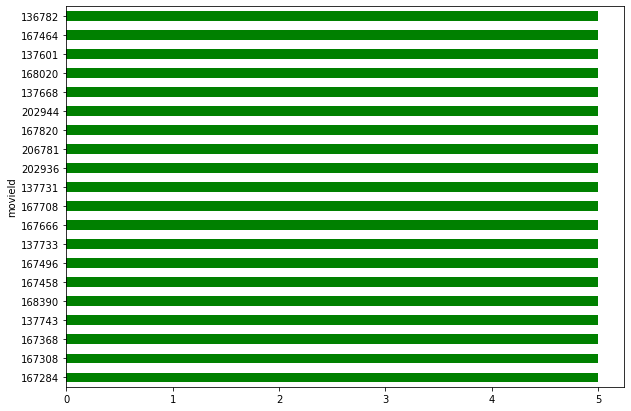

In [32]:
ratings_by_movies_m['rating']['mean'].sort_values().tail(20).plot(kind='barh', color='g', figsize=(10,7));

In [33]:
ratings_by_movies_m['rating']['mean'].sort_values().head(20) # minimum ratings 0.5

movieId
186681    0.5
177417    0.5
172451    0.5
182635    0.5
188703    0.5
177419    0.5
149102    0.5
182647    0.5
163749    0.5
119013    0.5
177423    0.5
177425    0.5
149402    0.5
206819    0.5
207153    0.5
109355    0.5
207387    0.5
207375    0.5
186387    0.5
172599    0.5
Name: mean, dtype: float64

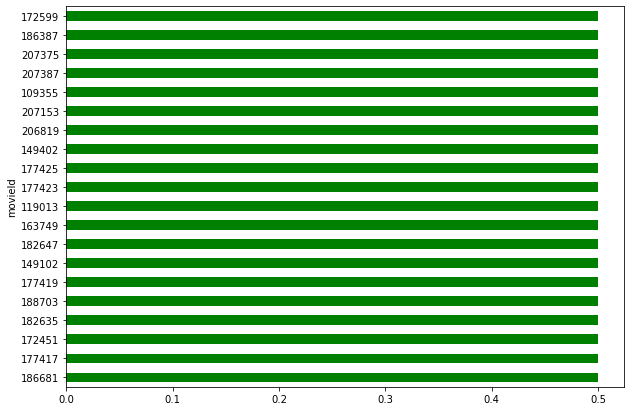

In [34]:
ratings_by_movies_m['rating']['mean'].sort_values().head(20).plot(kind='barh', color='g', figsize=(10,7));

In [35]:
movies.loc[movies['movieId']==3941] # search by id

,movieId,title,genres
3837,3941,Sorority House Massacre (1986),Horror


In [36]:
ratings_by_movies_t = ratings_movies.groupby('title').agg([np.mean, np.size])
ratings_by_movies_t.pop('movieId')
ratings_by_movies_t.pop('userId')



,mean,size
title,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",134530.000000,1
"""Great Performances"" Cats (1998)",82049.960894,179
#1 Cheerleader Camp (2010),78096.444444,9
#Captured (2017),73574.000000,2
#Female Pleasure (2018),76517.333333,3
...,...,...
…And the Fifth Horseman Is Fear (1965),74910.500000,2
キサラギ (2007),87193.500000,2
チェブラーシカ (2010),74980.666667,9


Worst rated movies

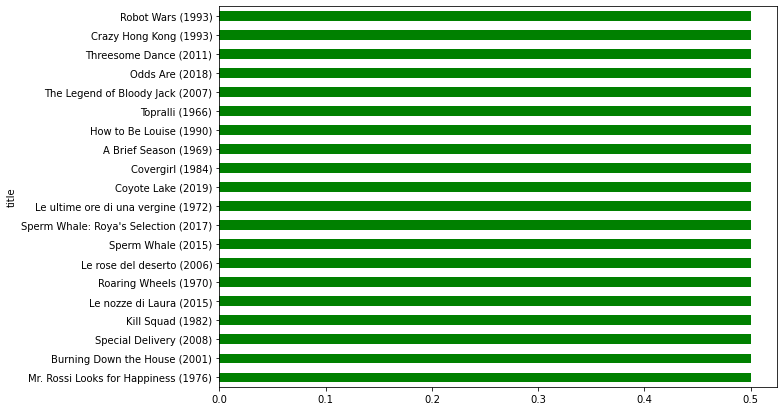

In [37]:
# plot 20 worst rated movies
ratings_by_movies_t['rating']['mean'].sort_values().head(20).plot(kind='barh', color='g', figsize=(10,7));

Top Rated movies

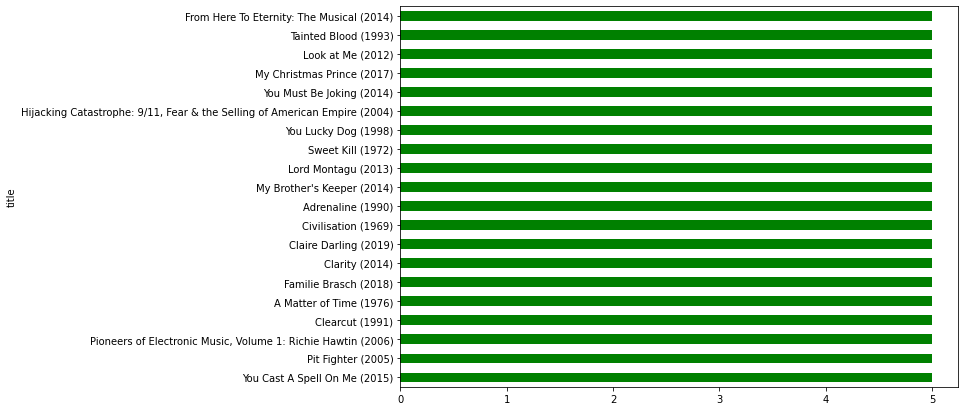

In [38]:
# plot top 20 rated movies
ratings_by_movies_t['rating']['mean'].sort_values().tail(20).plot(kind='barh', color='g', figsize=(10,7));

In [39]:
# locating specific movie title
ratings_movies.loc[ratings_movies['title']=='Cosmos']

,movieId,title,genres,userId,rating
24752861,171495,Cosmos,(no genres listed),439,2.0
24752862,171495,Cosmos,(no genres listed),1428,4.5
24752863,171495,Cosmos,(no genres listed),1524,5.0
24752864,171495,Cosmos,(no genres listed),2389,5.0
24752865,171495,Cosmos,(no genres listed),2653,2.5
...,...,...,...,...,...
24753133,171495,Cosmos,(no genres listed),158686,4.0
24753134,171495,Cosmos,(no genres listed),159054,5.0
24753135,171495,Cosmos,(no genres listed),161269,4.0
24753136,171495,Cosmos,(no genres listed),161367,4.0


Top Rated movies filter by popularity

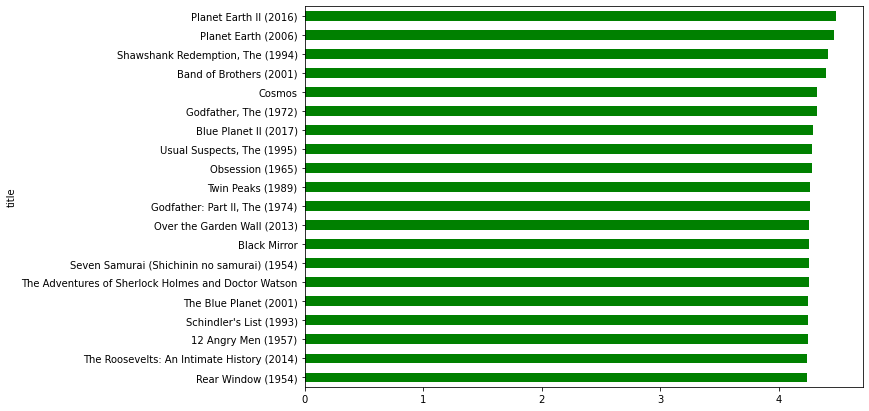

In [40]:
# filter top movies by popularity
ratings_by_movies_t1=ratings_by_movies_t['rating']['size']>20
ratings_by_movies_t1=ratings_by_movies_t[ratings_by_movies_t1]
ratings_by_movies_t1['rating']['mean'].sort_values().tail(20).plot(kind='barh', color='g', figsize=(10,7)); # top rated filtered by ratings count 

Worst rated movies by popularity

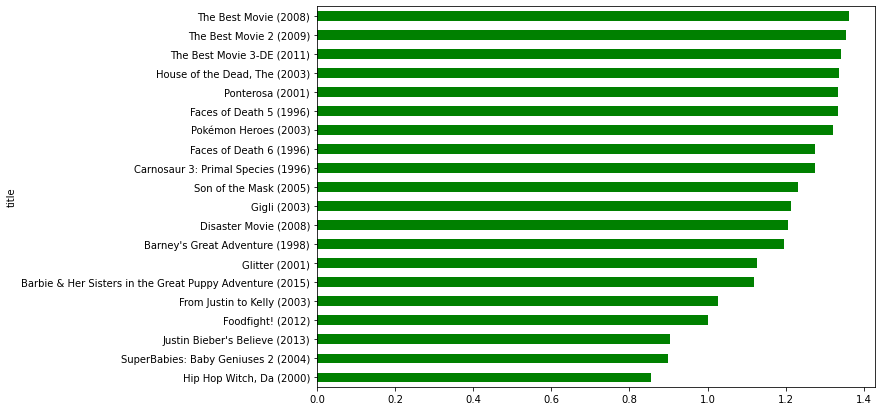

In [41]:
ratings_by_movies_t1['rating']['mean'].sort_values().head(20).plot(kind='barh', color='g', figsize=(10,7)); # worst rated filtered by ratings count

# Content-Based Filtering


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
# any alphanumeric and spaces acceptable
tfidf_genres = TfidfVectorizer(token_pattern = '[a-zA-Z0-9\-]+')

#Replace NaN with an empty string
# movies['genres'] = movies['genres'].replace(to_replace="(no genres listed)", value="")

#drop no genres listed
movies=movies.drop(movies['genres'].loc[movies['genres']=='(no genres listed)'].index)


#Construction of TF-IDF matrix by fitting and transforming the data
tfidf_movies_genres_matrix = tfidf_genres.fit_transform(movies['genres'])
print("Genres :"," ",tfidf_genres.get_feature_names())

# Compute the cosine similarity matrix

print('Their shape is:',tfidf_movies_genres_matrix.shape)
cosine_sim_movies = linear_kernel(tfidf_movies_genres_matrix, tfidf_movies_genres_matrix)
print('cosine similarity matrix:')
print(cosine_sim_movies)

Genres :   ['action', 'adventure', 'animation', 'children', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'film-noir', 'horror', 'imax', 'musical', 'mystery', 'romance', 'sci-fi', 'thriller', 'war', 'western']
Their shape is: (57361, 19)
cosine similarity matrix:
[[1.         0.828194   0.16276817 ... 0.         0.21240484 0.31905143]
 [0.828194   1.         0.         ... 0.         0.         0.38523755]
 [0.16276817 0.         1.         ... 0.         0.46165262 0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.21240484 0.         0.46165262 ... 0.         1.         0.2244596 ]
 [0.31905143 0.38523755 0.         ... 0.         0.2244596  1.        ]]


In [43]:
def get_genre_recommendations(movie_title, cosine_sim_movies=cosine_sim_movies):
    
    # Get the index of the movie that matches the title
    idx_movie = movies.loc[movies['title'].isin([movie_title])]
    idx_movie = idx_movie.index
    
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores_movies = list(enumerate(cosine_sim_movies[idx_movie][0]))
    
    # Sort the movies based on the similarity scores
    sim_scores_movies = sorted(sim_scores_movies, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores_movies = sim_scores_movies[1:11]
    
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores_movies]
    
    # return top movies
    return movies['title'].iloc[movie_indices]

In [44]:
get_genre_recommendations("Band of Brothers (2001)")

25                        Othello (1995)
30                Dangerous Minds (1995)
39       Cry, the Beloved Country (1995)
42                    Restoration (1995)
54                        Georgia (1995)
56          Home for the Holidays (1995)
61             Mr. Holland's Opus (1995)
66                       Two Bits (1995)
89     The Journey of August King (1995)
112             Margaret's Museum (1995)
Name: title, dtype: object

In [45]:
ratings_movies.loc[ratings_movies['title']=="Margaret's Museum (1995)"]

,movieId,title,genres,userId,rating
942331,114,Margaret's Museum (1995),Drama,986,1.0
942332,114,Margaret's Museum (1995),Drama,1089,1.0
942333,114,Margaret's Museum (1995),Drama,2067,5.0
942334,114,Margaret's Museum (1995),Drama,2208,5.0
942335,114,Margaret's Museum (1995),Drama,2213,4.0
...,...,...,...,...,...
942556,114,Margaret's Museum (1995),Drama,157468,4.0
942557,114,Margaret's Museum (1995),Drama,158066,3.0
942558,114,Margaret's Museum (1995),Drama,158401,4.0
942559,114,Margaret's Museum (1995),Drama,159773,3.0


In [46]:
def get_recommendation_by_history(userId):
    
    recommended_list = []
    movie_list = []
    userrating = ratings[ratings["userId"]== userId]
    for key, row in userrating.iterrows():
        movie_list.append((movies["title"][row["movieId"]==movies["movieId"]]).values) 
    for index, movie in enumerate(movie_list):
        for key, movie_recommended in get_genre_recommendations(movie[0]).iteritems():
            recommended_list.append(movie_recommended)

    # removing already watched movie from recommended list    
    for movie_title in recommended_list:
        if movie_title in movie_list:
            recommended_list.remove(movie_title)
    
    return set(recommended_list)

In [47]:
get_recommendation_by_history(986)

{'12 Dogs of Christmas, The (2005)',
 '16 Wishes (2010)',
 '2046 (2004)',
 '5 Card Stud (1968)',
 '5,000 Fingers of Dr. T, The (1953)',
 '99 and 44/100% Dead (1974)',
 'A Moment of Romance (1990)',
 'A Scandal in Paris (1946)',
 'A Walk in the Sun (1945)',
 'Absent-Minded Professor, The (1961)',
 'Abyss, The (1989)',
 'Ace Ventura: When Nature Calls (1995)',
 'Addams Family Values (1993)',
 'Addams Family, The (1991)',
 'Adventures of Captain Marvel (1941)',
 'Adventures of Pinocchio, The (1996)',
 'Adventures of Robin Hood, The (1938)',
 'Adventures of Rocky and Bullwinkle, The (2000)',
 'Adventures of Sharkboy and Lavagirl 3-D, The (2005)',
 'Agent Cody Banks (2003)',
 'Aladdin (1992)',
 'Albino Alligator (1996)',
 'Alice (1990)',
 'Alice in Wonderland (1951)',
 'Alita: Battle Angel (2019)',
 'All Quiet on the Western Front (1930)',
 'All Things Fair (Lust och fägring stor) (1995)',
 "All the Queen's Men (2001)",
 'Allan Quatermain and the Lost City of Gold (1987)',
 'Altered Percept

Collaborative Filtering


 With enough computing power we could create the matrix with the below code

In [48]:
# ratings_movies_filtered=ratings_movies['rating']>3.5
# ratings_movies_filtered=ratings_movies[ratings_movies_filtered]
# ratings_movies_filtered
# chunk_size = 5000
# chunks = [x for x in range(0, ratings_movies_filtered.shape[0], chunk_size)]

# for i in range(0, len(chunks) - 1):
#     print(chunks[i], chunks[i + 1] - 1)
# matrix_ratings_items = pd.concat([ratings_movies_filtered.iloc[ chunks[i]:chunks[i + 1] - 1 ].pivot(index='movieId', columns='userId', values='rating').reset_index(drop=True) for i in range(0, len(chunks) - 1)])


Since we can't handle 25 million of data we will create a sample of the dataset by taking the top 1001 users an create a new dataset

In [49]:
#find top 1001 users by volume of movie votes and drop the first one cause he compromises the sample
bestusers=ratings_by_users_r['rating']['size'].sort_values(ascending=False).head(1001)
best_users=pd.DataFrame(bestusers)
best_users.reset_index(level=0, inplace=True)
best_users=best_users.drop(index=0)
best_users

,userId,size
1,80974,9178.0
2,137293,8913.0
3,33844,7919.0
4,20055,7488.0
5,109731,6647.0
...,...,...
996,128243,1442.0
997,93305,1442.0
998,91434,1441.0
999,83814,1440.0


In [50]:
ratings_movies_size=ratings_movies.merge(best_users, on='userId')
ratings_movies_size

,movieId,title,genres,userId,rating,size
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,548,4.5,3212.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,548,4.0,3212.0
2,6,Heat (1995),Action|Crime|Thriller,548,4.0,3212.0
3,9,Sudden Death (1995),Action,548,3.0,3212.0
4,10,GoldenEye (1995),Action|Adventure|Thriller,548,3.5,3212.0
...,...,...,...,...,...,...
2174483,92152,"Turn Me On, Dammit! (Få meg på, for faen) (2011)",Comedy,14501,3.5,1600.0
2174484,92154,Faust (2011),Drama,14501,2.5,1600.0
2174485,92159,Decasia: The State of Decay (2002),Documentary,14501,3.0,1600.0
2174486,92163,Fados (2007),Documentary|Musical,14501,2.5,1600.0


In [51]:
#since the new dataset is still large we are going to take a sample of that for the next steps
ratings_movies_sample=ratings_movies_size.sample(frac=0.1,  random_state=1)
ratings_movies_sample

,movieId,title,genres,userId,rating,size
945852,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,77506,3.0,1884.0
504065,7082,That Touch of Mink (1962),Comedy|Romance,39669,4.0,2955.0
1701150,4678,UHF (1989),Comedy,138141,4.0,2040.0
1482902,41688,Cowards Bend the Knee (a.k.a. The Blue Hands) ...,Drama|Romance,119765,3.0,2907.0
29404,5418,"Bourne Identity, The (2002)",Action|Mystery|Thriller,2775,4.0,1774.0
...,...,...,...,...,...,...
496727,34150,Fantastic Four (2005),Action|Adventure|Sci-Fi,38814,1.0,1626.0
1901607,2521,Airport 1975 (1974),Action|Drama|Thriller,154484,2.5,1672.0
80236,6615,Freddy vs. Jason (2003),Action|Horror|Thriller,7865,0.5,1821.0
211789,163076,Jean-Claude Van Johnson (2016),Comedy,19247,3.5,3368.0


In [52]:
# new movies dataset
n_users = len(ratings_movies_sample['userId'].unique())
n_items = len(ratings_movies_sample['movieId'].unique())
R_shape = (n_users, n_items)
print (n_users, ' users')
print (n_items, ' movies')

1000  users
23518  movies


In [53]:
# create a matrix
ratings_sample=ratings_movies_sample[['userId','movieId','rating']]
movies_sample=ratings_movies_sample[['movieId','title','genres']]
ratings_sample=ratings_sample.reset_index()
ratings_sample=ratings_sample[['userId','movieId','rating']]
movies_sample=movies_sample.drop_duplicates(['movieId'],keep='first')
movies_sample=movies_sample.reset_index()
movies_sample=movies_sample[['movieId','title','genres']]
ratings_movies_sample=movies_sample.merge(ratings_sample,on='movieId',how='inner')

In [54]:
matrix_ratings_items = ratings_movies_sample.pivot_table(index=['movieId'],columns=['userId'],values='rating').reset_index(drop=True)


In [55]:
matrix_ratings_items.fillna( 0, inplace = True )

In [56]:
matrix_ratings_items

userId,548,626,847,997,1401,1652,1748,1920,1977,2003,...,160951,161184,161342,161383,161544,161586,161928,162047,162271,162516
0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,1.5,4.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23516,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
from sklearn.metrics.pairwise import pairwise_distances

movie_similarity = 1 - pairwise_distances( matrix_ratings_items.to_numpy(), metric="cosine" )
np.fill_diagonal( movie_similarity, 0 ) #Filling diagonals with 0s for future use when sorting is done
matrix_ratings_items = pd.DataFrame( movie_similarity )
matrix_ratings_items

,0,1,2,3,4,5,6,7,8,9,...,23508,23509,23510,23511,23512,23513,23514,23515,23516,23517
0,0.000000,0.048835,0.053765,0.000000,0.028899,0.066720,0.082900,0.000000,0.080947,0.074587,...,0.0,0.0,0.060248,0.0,0.0,0.105433,0.0,0.0,0.0,0.135557
1,0.048835,0.000000,0.034383,0.000000,0.037251,0.052349,0.058372,0.000000,0.005565,0.097114,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,0.053765,0.034383,0.000000,0.043864,0.034131,0.025885,0.065751,0.044823,0.094185,0.129186,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
3,0.000000,0.000000,0.043864,0.000000,0.043450,0.000000,0.000000,0.048910,0.000000,0.057896,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,0.028899,0.037251,0.034131,0.043450,0.000000,0.043364,0.000000,0.035520,0.034372,0.043874,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23513,0.105433,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
23514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
23515,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
23516,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


In [58]:
def find_similar(MovieTitle): 

    try:
        movie_pick=MovieTitle
        mov_ind=movies_sample[movies_sample['title']==movie_pick].index.tolist()
        mov_ind=mov_ind[0]                
        movies_sample['similarity'] = matrix_ratings_items.iloc[mov_ind]        
    except:
        print("The movie does not exist \n Please try again")

In [59]:
def item_item_reccomendation(user_id):
    
    user_movie= ratings_movies_sample[(ratings_movies_sample.userId==user_id) & ratings_movies_sample.rating.isin([5,4.5,4])][['title']]
    user_movie=user_movie.iloc[0,0]
    find_similar(user_movie)
    movies_for_specific_user=movies_sample.sort_values( ["similarity"], ascending = False )
    filtered_movies_for_specific_user=movies_for_specific_user[movies_for_specific_user['similarity'] >=0.25]['movieId']
    recommended_movies=list()
    proposed_movies=pd.DataFrame()
    user_watched_movies= ratings_sample[ratings_sample['userId']== user_id]['movieId']
    for movieId in filtered_movies_for_specific_user:
            if movieId not in user_watched_movies:
                movie_addition= ratings_sample[(ratings_sample.movieId==movieId)]
                proposed_movies=pd.concat([proposed_movies,movie_addition])
            top10=proposed_movies.sort_values(['rating'], ascending = False )[1:11]
            top10=top10.merge(movies_sample,on='movieId')
            top10=top10[['title']]
            top_recommendations=top10.drop_duplicates('title')
    return top_recommendations

In [60]:
user_id= 548
print("Recommended movies:\n",(item_item_reccomendation(user_id)))

Recommended movies:
                               title
0             Risky Business (1983)
2                       Tess (1979)
3                Bebe's Kids (1992)
4  Happiest Millionaire, The (1967)
5      Daughters of the Dust (1991)
6   Vicky Cristina Barcelona (2008)
7                    Thinner (1996)
8                     Batman (1989)


In [61]:
#calculating RMSE of item based collaborative filtering
from surprise import Reader, Dataset, SVD, KNNBasic,SVDpp, NMF
from surprise.model_selection import cross_validate

reader = Reader()
#dataset creation
data = Dataset.load_from_df(ratings_sample[['userId', 'movieId', 'rating']], reader)
#model
knn = KNNBasic(sim_options = {'name':'cosine'})
#Evaluating the performance in terms of RMSE
cross_validate(knn, data, measures=['RMSE', 'mae'], cv = 5,verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9679  0.9720  0.9762  0.9737  0.9689  0.9717  0.0031  
MAE (testset)     0.7442  0.7477  0.7505  0.7485  0.7449  0.7471  0.0023  
Fit time          1.55    1.60    1.71    1.83    1.63    1.66    0.10    
Test time         2.83    2.70    2.94    2.98    2.69    2.83    0.12    


{'test_rmse': array([0.96785845, 0.97200639, 0.976226  , 0.97371153, 0.9688604 ]),
 'test_mae': array([0.74417007, 0.74766191, 0.75045718, 0.74847362, 0.74489212]),
 'fit_time': (1.5499448776245117,
  1.598069429397583,
  1.712019681930542,
  1.8349347114562988,
  1.6270530223846436),
 'test_time': (2.8316009044647217,
  2.6974737644195557,
  2.9373221397399902,
  2.979311943054199,
  2.692476272583008)}

# user based

In [62]:
matrix_ratings_users = ratings_movies_sample.pivot_table(index=['userId'],columns=['movieId'],values='rating').reset_index(drop=True)
matrix_ratings_users.fillna( 0, inplace = True )
movie_similarity = 1 - pairwise_distances( matrix_ratings_users.to_numpy(), metric="cosine" )
np.fill_diagonal( movie_similarity, 0 ) 
matrix_ratings_users = pd.DataFrame( movie_similarity )
matrix_ratings_users

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.000000,0.033396,0.018728,0.031675,0.037379,0.031551,0.038435,0.047572,0.032757,0.035804,...,0.066764,0.038991,0.050449,0.075773,0.023171,0.044782,0.028419,0.031615,0.017984,0.038261
1,0.033396,0.000000,0.033366,0.044830,0.042592,0.034044,0.043779,0.026414,0.050084,0.026521,...,0.019811,0.029354,0.008803,0.056953,0.035364,0.020731,0.034181,0.017098,0.062523,0.045637
2,0.018728,0.033366,0.000000,0.045240,0.046529,0.026479,0.016095,0.018065,0.021415,0.041623,...,0.033401,0.035347,0.026955,0.035058,0.041323,0.025692,0.025973,0.031440,0.050980,0.042724
3,0.031675,0.044830,0.045240,0.000000,0.069072,0.077217,0.049208,0.015431,0.047095,0.013981,...,0.045578,0.047457,0.072626,0.026116,0.039123,0.029088,0.062507,0.035939,0.051352,0.041642
4,0.037379,0.042592,0.046529,0.069072,0.000000,0.045993,0.046312,0.049464,0.037058,0.063321,...,0.053970,0.019017,0.042234,0.034723,0.020392,0.038131,0.033190,0.024760,0.043034,0.027590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.044782,0.020731,0.025692,0.029088,0.038131,0.042713,0.045239,0.039118,0.022607,0.072614,...,0.043030,0.056661,0.044393,0.066827,0.030531,0.000000,0.029921,0.040727,0.021660,0.062907
996,0.028419,0.034181,0.025973,0.062507,0.033190,0.019541,0.021658,0.035204,0.049015,0.013040,...,0.056450,0.048901,0.046094,0.034313,0.032381,0.029921,0.000000,0.018270,0.023350,0.033667
997,0.031615,0.017098,0.031440,0.035939,0.024760,0.019524,0.036007,0.022084,0.012658,0.053899,...,0.034907,0.042274,0.046947,0.027211,0.016985,0.040727,0.018270,0.000000,0.034739,0.065251
998,0.017984,0.062523,0.050980,0.051352,0.043034,0.047425,0.044055,0.037300,0.043788,0.021124,...,0.028314,0.028414,0.050621,0.035064,0.012859,0.021660,0.023350,0.034739,0.000000,0.057372


In [63]:
similar_user_list= matrix_ratings_users.idxmax(axis=1)
similar_user= similar_user_list.to_frame()
similar_user.columns=['similarUser']
similar_user

,similarUser
0,66
1,428
2,912
3,906
4,348
...,...
995,421
996,369
997,570
998,405


In [64]:
def user_user_reccomendation(userId):
    
    user_watched_movies= ratings[ratings['userId']== userId]['movieId']
    sim_user=similar_user.iloc[0,0]
    proposed_movies=pd.DataFrame(columns=['movieId','title','genres','userId','rating','timestamp'])
    for movieId in ratings[ratings['userId']== sim_user]['movieId']:
        if movieId not in user_watched_movies:
            movie_addition= ratings_movies[(ratings_movies.userId==sim_user) & (ratings_movies.movieId==movieId)]
            proposed_movies=pd.concat([proposed_movies,movie_addition])
        top10=proposed_movies.sort_values(['rating'], ascending = False )[1:11]
        top10=top10[['title']]
        top_recommendations=top10.drop_duplicates('title')
    return top_recommendations


In [78]:
user_id=548
print("We recommend :\n",(user_user_reccomendation(user_id)))

We recommend :
                                         title
2133250      Shawshank Redemption, The (1994)
13217003  Fast Times at Ridgemont High (1982)
15426010                Legally Blonde (2001)
10623241                 Pleasantville (1998)
149362                       GoldenEye (1995)
15948810                Ocean's Eleven (2001)
16036860         Royal Tenenbaums, The (2001)
6972522             Dead Poets Society (1989)
3048783                      Firm, The (1993)
5197614             Gone with the Wind (1939)


In [81]:
# calculating RMSE of user based collaborative filtering

reader = Reader()
#dataset creation
data = Dataset.load_from_df(ratings_sample[['userId', 'movieId', 'rating']], reader)
#model
knn = KNNBasic(sim_options = {'name':'cosine','user_based': True})
#Evaluating the performance in terms of RMSE
cross_validate(knn, data, measures=['RMSE', 'MAE'], cv = 5,verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9762  0.9691  0.9675  0.9748  0.9738  0.9723  0.0034  
MAE (testset)     0.7482  0.7454  0.7467  0.7492  0.7476  0.7474  0.0013  
Fit time          1.51    1.54    1.53    1.63    1.85    1.61    0.13    
Test time         2.86    2.88    2.89    3.10    3.59    3.06    0.28    


{'test_rmse': array([0.97617679, 0.96905274, 0.96751543, 0.97484471, 0.97383836]),
 'test_mae': array([0.74816628, 0.74538208, 0.74671475, 0.749247  , 0.7476092 ]),
 'fit_time': (1.5102295875549316,
  1.536095142364502,
  1.530122995376587,
  1.625065565109253,
  1.852935552597046),
 'test_time': (2.8603804111480713,
  2.8806378841400146,
  2.887338876724243,
  3.096221446990967,
  3.5909392833709717)}

# Hybrid Model

In [46]:
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')
ratings_movies = movies.merge(ratings, on='movieId', how='inner')
ratings_by_users = ratings_movies.groupby('userId').agg([np.size, np.mean])
ratings_by_users_r=ratings_by_users.drop('movieId', axis = 1)


In [47]:
#naking a new sample based on top 1000 users with the most reviewed movies
bestusers=ratings_by_users_r['rating']['size'].sort_values(ascending=False).head(1001)
best_users=pd.DataFrame(bestusers)
best_users.reset_index(level=0, inplace=True)
best_users=best_users.drop(index=0)
ratings_movies_size=ratings_movies.merge(best_users, on='userId')
ratings_movies_sample=ratings_movies_size.sample(frac=0.1,  random_state=1)


In [48]:

n_users = len(ratings_movies_sample['userId'].unique())
n_items = len(ratings_movies_sample['movieId'].unique())
R_shape = (n_users, n_items)
print (n_users, ' users')
print (n_items, ' movies')

1000  users
23518  movies


In [49]:
ratings_sample=ratings_movies_sample[['userId','movieId','rating']]
movies_sample=ratings_movies_sample[['movieId','title','genres']]
ratings_sample=ratings_sample.reset_index()
ratings_sample=ratings_sample[['userId','movieId','rating']]
movies_sample=movies_sample.drop_duplicates(['movieId'],keep='first')
movies_sample=movies_sample.reset_index()
movies_sample=movies_sample[['movieId','title','genres']]
ratings_movies_sample=movies_sample.merge(ratings_sample,on='movieId',how='inner')

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
# letters numbers and space
tfidf_genres = TfidfVectorizer(token_pattern = '[a-zA-Z0-9\-]+')

#Replace NaN with an empty string
# movies['genres'] = movies['genres'].replace(to_replace="(no genres listed)", value="")

movies_sample=movies_sample.drop(movies_sample['genres'].loc[movies_sample['genres']=='(no genres listed)'].index)


#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_movies_genres_matrix = tfidf_genres.fit_transform(movies_sample['genres'])
print("Genres :"," ",tfidf_genres.get_feature_names())

# Compute the cosine similarity matrix

print(tfidf_movies_genres_matrix.shape)
#print(tfidf_movies_genres_matrix.dtype)
cosine_sim_movies = linear_kernel(tfidf_movies_genres_matrix, tfidf_movies_genres_matrix)
print()
print(cosine_sim_movies)

Genres :   ['action', 'adventure', 'animation', 'children', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'film-noir', 'horror', 'imax', 'musical', 'mystery', 'romance', 'sci-fi', 'thriller', 'war', 'western']
(22964, 19)

[[1.         0.26813061 0.45320387 ... 0.         0.         0.45320387]
 [0.26813061 1.         0.59163353 ... 0.         0.         0.59163353]
 [0.45320387 0.59163353 1.         ... 0.         0.         1.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.45320387 0.59163353 1.         ... 0.         0.         1.        ]]


In [72]:
def get_genre_recommendations_sample(movie_title, cosine_sim_movies=cosine_sim_movies):
    
    # Get the index of the movie that matches the title
    idx_movie = movies_sample.loc[movies_sample['title'].isin([movie_title])]
    idx_movie = idx_movie.index
    
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores_movies = list(enumerate(cosine_sim_movies[idx_movie][0]))
    
    # Sort the movies based on the similarity scores
    sim_scores_movies = sorted(sim_scores_movies, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores_movies = sim_scores_movies[1:11]
    
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores_movies]
    
    # top 10 movies
    return movies_sample['title'].iloc[movie_indices]

In [73]:
get_genre_recommendations_sample("Straight A's (2013)")

2248           What Dreams May Come (1998)
166                          Legend (1985)
295                         Aladdin (2019)
1572                      Ladyhawke (1985)
10899       Secret of Moonacre, The (2008)
22107            The Little Mermaid (2018)
3495                          Click (2006)
604                        Stardust (2007)
2001                      Fall, The (2006)
3066     Nibelungen: Siegfried, Die (1924)
Name: title, dtype: object

In [74]:
def get_sample_recommendation_by_history(userId):
    
    recommended_list = []
    movie_list = []
    userrating = ratings_sample[ratings_sample["userId"]== userId]
    for key, row in userrating.iterrows():
        movie_list.append((movies_sample["title"][row["movieId"]==movies_sample["movieId"]]).values) 
    for index, movie in enumerate(movie_list):
        for key, movie_recommended in get_genre_recommendations_sample(movie[0]).iteritems():
            recommended_list.append(movie_recommended)
            recommended_list2=list(set(recommended_list))
    
    movie_list=pd.DataFrame(movie_list, columns=['movie_list'])
    recommended_list3=pd.DataFrame(recommended_list2, columns=['movie_list'])
    movie_list['drop']='drop'
    recommended_list3=recommended_list3.merge(movie_list,on='movie_list',how='left')
    recommended_list3=recommended_list3.fillna('keep')
    recommended_list4=recommended_list3.loc[recommended_list3['drop']=='keep']
    final_recommended_list = recommended_list4['movie_list'].to_list()
    
    return set(final_recommended_list)

In [75]:
userId=548
get_sample_recommendation_by_history(userId)

{'One Minute Time Machine (2014)',
 'Heat, The (2013)',
 'How to Talk to Girls at Parties (2017)',
 'Forbidden Planet (1956)',
 'Kung Fu Panda 3 (2016)',
 'Wedding in Malinovka (1967)',
 'Conversation, The (1974)',
 'American Fable (2017)',
 'Rabbit-Proof Fence (2002)',
 "Gulliver's Travels (1939)",
 'We Are the Flesh (2016)',
 'While the City Sleeps (1956)',
 'Kazaam (1996)',
 'Condorman (1981)',
 'Sweet Home Alabama (2002)',
 "King Solomon's Mines (1985)",
 'Dirty Dancing (1987)',
 'Sherlock Jr. (1924)',
 'Presumed Guilty (Presunto culpable) (2008)',
 'Amazing Spider-Man, The (2012)',
 'The Voyage Across the Impossible (1904)',
 'Confidence (2003)',
 'Henry: Portrait of a Serial Killer (1986)',
 'Son of Paleface (1952)',
 'Iron Eagle IV (1995)',
 'Rock-A-Doodle (1991)',
 'The Cow (1990)',
 'The Predator (2018)',
 'Robots (2005)',
 'Rocky V (1990)',
 'Heart of Dragon (Long de xin) (1985)',
 'Garfield: The Movie (2004)',
 'Superman II: The Richard Donner Cut (2006)',
 'Thirty-Two Short

In [76]:
print ('there are ',len(get_sample_recommendation_by_history(548)), ' recommended movies based on content based filtering for the user with id',userId)

there are  1322  recommended movies based on content based filtering for the user with id 548


In [79]:
#calculating RMSE of hybrid system using  NMF

reader = Reader()

data = Dataset.load_from_df(ratings_sample[['userId', 'movieId', 'rating']], reader)
NMF = NMF()
cross_validate(NMF, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9045  0.9045  0.9077  0.9040  0.9069  0.9055  0.0015  
MAE (testset)     0.6924  0.6915  0.6940  0.6924  0.6953  0.6931  0.0014  
Fit time          15.89   17.92   16.67   16.46   18.36   17.06   0.93    
Test time         0.45    0.61    0.50    0.46    0.31    0.47    0.09    


{'test_rmse': array([0.9044861 , 0.9045065 , 0.90771019, 0.9040248 , 0.90694693]),
 'test_mae': array([0.69243735, 0.69149997, 0.6940448 , 0.69242198, 0.69534393]),
 'fit_time': (15.892866611480713,
  17.91570520401001,
  16.66842293739319,
  16.461519956588745,
  18.35645294189453),
 'test_time': (0.4504985809326172,
  0.6096484661102295,
  0.4977147579193115,
  0.45975685119628906,
  0.31381821632385254)}

In [77]:
# calculating RMSE of hybrid system using  SVD
reader = Reader()

data = Dataset.load_from_df(ratings_sample[['userId', 'movieId', 'rating']], reader)
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8517  0.8493  0.8524  0.8504  0.8541  0.8516  0.0017  
MAE (testset)     0.6559  0.6506  0.6546  0.6528  0.6547  0.6537  0.0019  
Fit time          16.45   14.06   14.92   14.44   15.38   15.05   0.83    
Test time         0.55    0.43    0.38    0.47    0.41    0.45    0.06    


{'test_rmse': array([0.85166297, 0.84925616, 0.85241138, 0.85036726, 0.8540926 ]),
 'test_mae': array([0.655941  , 0.65060383, 0.6545546 , 0.65283633, 0.65474722]),
 'fit_time': (16.448516130447388,
  14.059947967529297,
  14.919459342956543,
  14.438749313354492,
  15.375217199325562),
 'test_time': (0.5522253513336182,
  0.4267759323120117,
  0.37876200675964355,
  0.4677121639251709,
  0.40674924850463867)}

In [93]:
# calculating RMSE of hybrid system using  SVD++

reader = Reader()

data = Dataset.load_from_df(ratings_sample[['userId', 'movieId', 'rating']], reader)
svd = SVDpp()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8317  0.8440  0.8418  0.8412  0.8398  0.8397  0.0042  
MAE (testset)     0.6350  0.6447  0.6440  0.6435  0.6416  0.6417  0.0035  
Fit time          575.29  578.39  579.96  589.80  625.26  589.74  18.41   
Test time         10.81   10.62   10.89   11.76   12.22   11.26   0.62    


{'test_rmse': array([0.83166826, 0.84398493, 0.8417517 , 0.84123702, 0.83978006]),
 'test_mae': array([0.63504053, 0.64466942, 0.64396341, 0.6435098 , 0.64155542]),
 'fit_time': (575.2860205173492,
  578.3922309875488,
  579.9613163471222,
  589.8026552200317,
  625.2642548084259),
 'test_time': (10.809561729431152,
  10.621889591217041,
  10.887714385986328,
  11.762232065200806,
  12.219970464706421)}

In [94]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [95]:
svd.predict(548,567)


Prediction(uid=548, iid=567, r_ui=None, est=3.2835197579393824, details={'was_impossible': False})

In [ ]:
# Combination of content and svd methods to calculate top 10 recommended movies


In [99]:
user_id = 548

def hybrid_content_svd_model(userId):

    recommended_movies_by_content_model = get_sample_recommendation_by_history(userId)
    recommended_movies_by_content_model = movies_sample[movies_sample.apply(lambda movie: movie["title"] in recommended_movies_by_content_model, axis=1)]
    for key, columns in recommended_movies_by_content_model.iterrows():
        predict = svd.predict(userId, columns["movieId"])
        recommended_movies_by_content_model.loc[key, "predicted_rating"] = predict.est

    return recommended_movies_by_content_model.sort_values("predicted_rating", ascending=False).iloc[0:11]
        
hybrid_content_svd_model(user_id)

C:\Users\gekou\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\gekou\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,movieId,title,genres,predicted_rating
348,858,"Godfather, The (1972)",Crime|Drama,4.482605
1930,1270,Back to the Future (1985),Adventure|Comedy|Sci-Fi,4.470469
534,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.423062
4254,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.416140
524,541,Blade Runner (1982),Action|Sci-Fi|Thriller,4.356611
459,1258,"Shining, The (1980)",Horror,4.352670
2890,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.335978
416,908,North by Northwest (1959),Action|Adventure|Mystery|Romance|Thriller,4.319859
971,1265,Groundhog Day (1993),Comedy|Fantasy|Romance,4.301082
1178,3730,"Conversation, The (1974)",Drama|Mystery,4.295474


In [104]:
# The user hasn't seen the movie in the sample dataset and the predicted rating is 4.416140
ratings_movies_sample.loc[(ratings_movies_sample['userId']==548) & (ratings_movies_sample['movieId']==593)]

,movieId,title,genres,userId,rating


In [106]:
# The user has seen the movie in the original 25m dataset and the actual rating is 4.5
ratings_movies.loc[(ratings_movies['userId']==548) & (ratings_movies['movieId']==593)]

,movieId,title,genres,userId,rating,timestamp
4019271,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,548,4.5,1430256228


We notice that the prediction model comes pretty close to the actual rating that the user has given to the original data 

In [51]:
# check what unique gernes has user with id 548 rated
user_548=ratings_movies_sample.loc[(ratings_movies_sample['userId']==548)]
sorted(list(set(user_548['genres'].tolist()))) # unique values of column in a list

['Action',
 'Action|Adventure',
 'Action|Adventure|Children|Drama|Fantasy|Sci-Fi',
 'Action|Adventure|Comedy|Crime',
 'Action|Adventure|Comedy|Drama|War',
 'Action|Adventure|Comedy|Fantasy',
 'Action|Adventure|Comedy|Fantasy|Horror|Thriller',
 'Action|Adventure|Comedy|Romance|Thriller',
 'Action|Adventure|Comedy|Sci-Fi',
 'Action|Adventure|Crime|Thriller',
 'Action|Adventure|Drama',
 'Action|Adventure|Drama|Fantasy',
 'Action|Adventure|Drama|Thriller',
 'Action|Adventure|Fantasy',
 'Action|Adventure|Horror|Mystery|Sci-Fi|Thriller',
 'Action|Adventure|IMAX',
 'Action|Adventure|Mystery|Sci-Fi',
 'Action|Adventure|Sci-Fi',
 'Action|Adventure|Sci-Fi|Thriller',
 'Action|Adventure|Thriller',
 'Action|Comedy',
 'Action|Comedy|Crime',
 'Action|Comedy|Crime|Drama|Thriller',
 'Action|Comedy|Crime|Mystery',
 'Action|Comedy|Crime|Thriller',
 'Action|Comedy|Drama',
 'Action|Comedy|Fantasy',
 'Action|Comedy|Fantasy|Horror',
 'Action|Comedy|Horror|Thriller',
 'Action|Comedy|Mystery|Romance|Thriller',

Seems to be good diversity regarding the genres